In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./data/hiion/scout_326822_000000.txt')
orb = df['orbit']

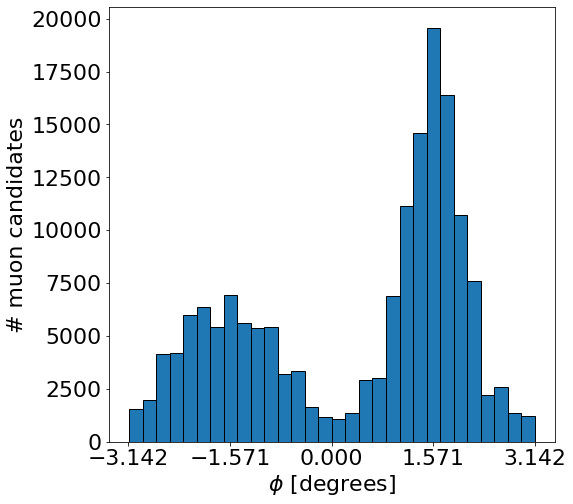

In [3]:
phiticks = [0.5*np.pi*i for i in range(-2,3)]
plt.rc('font', size=22)
plt.figure(figsize=(8,8))
plt.hist(df['phi'], bins = 30, histtype = 'bar', ec='black')
plt.xticks(phiticks)
plt.xlabel('$\phi$ [degrees]')
plt.ylabel('# muon candidates');

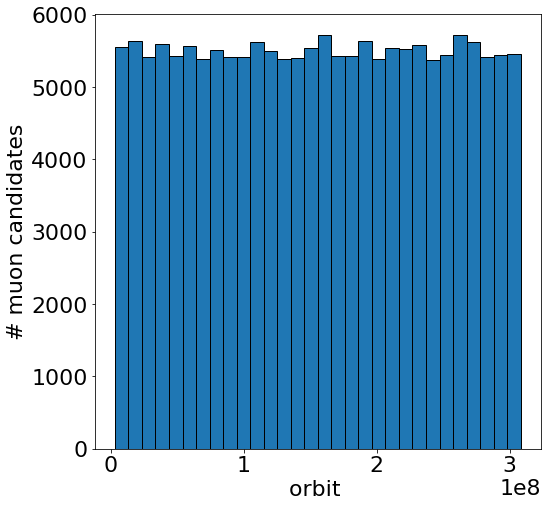

In [4]:
#orbitTicks = [0.5*np.pi*i for i in range(-2,3)]
plt.rc('font', size=22)
plt.figure(figsize=(8,8))
plt.hist(df['orbit'], bins = 30, histtype = 'bar', ec='black')
#plt.xticks(orbitTicks)
plt.xlabel('orbit ')
plt.ylabel('# muon candidates');

bxMin = 3445 
bxMax = 3555
timePerOrbit 2744.5 ns 
orbitsPerTimeUnit = 72873.019


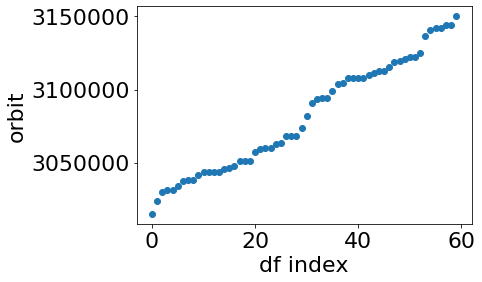

In [5]:
# bunch clock frequency = 40.07897 MHz 
# orbit clock frequency = 11.2455 kHz
# 1 orbit contains 3564 BX's (more accuretly, 3564 bunch places since not all bunches collide)
# more info: https://edms.cern.ch/file/445762/3/Vol3_Chap2_v4.pdf
nBXperOrbit = 3564 

# only BX's from the LHC abort gap are dumped in the CSV
bxMin, bxMax = df['bx'].min(), df['bx'].max()
print('bxMin = %d \nbxMax = %d'%(bxMin, bxMax))
# BX's within [bxMin, bxMax] = time period within the LHC abort gap of each orbit
# each line in CSV has a unique pair of (orbit, bx) which defines its timestamp
# no line will be appended in CSV, if and only if no muon candidates were recorded (=empty) 
# or if the scouting system was not running in those [problem]
# BX's <=bxMin OR >= bxMax are intentionally not appended in the CSV in order to avoid collisions

# for each orbit, we dump in the CSV 110 BX's (= bxMax - bxMin) that 'sit' in the LHC abort gap (end of the train)
# that is, each orbit in the CSV corresponds to 110*24.95 ns of active recorded time, due to our selection made 
# (we dump in CSV only a part of each orbit during the LHC abort gap)
timePerOrbit = 110*24.95
print('timePerOrbit %2.1f ns '%timePerOrbit)

timeUnit = 0.2*1e9 # desired time unit in seconds
orbitsPerTimeUnit = timeUnit/timePerOrbit
print('orbitsPerTimeUnit = %2.3f'%orbitsPerTimeUnit)

plt.scatter(range(60), df[0:60]['orbit']) # large vertical jumps here, will indicate failure of the scouting system and we have to care of this 
plt.xlabel('df index')
plt.ylabel('orbit');

orbitMin 3014882 orbitMax 308316192
nOrbits 305301310 
total recording time 837899445295.0000 ns (~= 837.9 s)


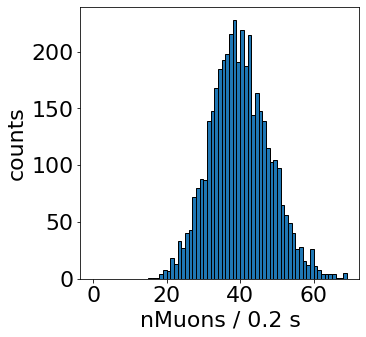

integral = 4186.0000 
totMuons = 164888.0000 which corresponds to the total nMuons the CSV file has
df.shape =  (165109, 6)


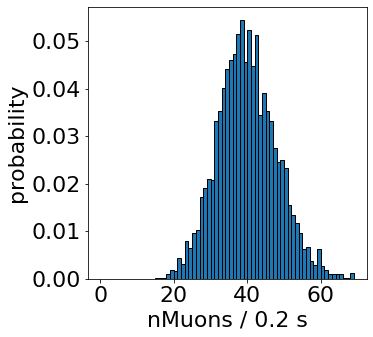

integral = 1.0000 
totMuons = 165006.1710 which corresponds to the total nMuons the CSV file has
df.shape =  (165109, 6)


In [6]:
orbitMin  = df['orbit'][:1].values[0]
orbitMax  = df['orbit'][-1:].values[0] 
rectime   = (orbitMax-orbitMin)*timePerOrbit # in ns
print('orbitMin %d orbitMax %d'%(orbitMin, orbitMax))
print('nOrbits %d '%(orbitMax - orbitMin))
print('total recording time %2.4f ns (~= %2.1f s)' %(rectime, rectime*1.e-9))

bins=int((orbitMax-orbitMin)/orbitsPerTimeUnit) 
timePerBin = rectime/bins

muons=np.zeros(bins)
sclice=np.array([orbitMin+ ((orbitMax-orbitMin)/bins)*i for i in range(bins+1)])
# Count the events in the first orbit = orbitMin
for orbit in orb:
    if(orbit > orbitMin): break
    if(orbit == orbitMin): muons[0] += 1
        
orb = orb[int(muons[0]):] # We already counted the first orbit
i = 0
for orbit in orb:
    while not (orbit > sclice[i] and orbit <= sclice[i + 1]) and i < bins-1: # Note the <= in 'orbit <= slicePlusOne[i]'. 
        i = i + 1                                                              # It is needed to capture the last orbit.
    muons[i] += 1


# make manually a histogram with our own desired (integer) binning 
# first bin includes all counts with nMuons in [0,1), 
# 6th bin all counts with nMuons in [5,6) = 5 if nMuons is integer-valued
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = False)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('counts')
plt.show()

integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += binCounts[i]*bin_edges[i] # the left edge is exactly equal to the nMuons in that bin (integer valued)

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)


# understanding what density = True does
maxBins = 70
plt.figure(figsize=(5,5))
binCounts, bin_edges, patches = plt.hist(muons, bins= [i for i in range(maxBins)], histtype = 'bar', ec='black', density = True)
plt.xlabel('nMuons / %2.1f s'%(timePerBin*1.e-9)) # latex can be entered in the label's string
plt.ylabel('probability')
plt.show()

integral = 0
totMuons = 0
for i in range(len(binCounts)): 
    binWidth = bin_edges[i+1] - bin_edges[i]
    integral += binCounts[i]*binWidth 
    totMuons += bins*binCounts[i]*bin_edges[i] # note the bins* and understand why is needed
# read https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html density:  

print('integral = %2.4f '%(integral))
print('totMuons = %2.4f which corresponds to the total nMuons the CSV file has'%(totMuons))
print('df.shape = ', df.shape)
# the very small number you was getting when sns.distplot(muons, kde=True) should be now apparent

In [7]:
np.savetxt('muons_ref.txt', muons, fmt =' %d ') # so that someone else can intstant access to the data without running this code